In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create DataFrame from data
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = pd.Series(iris.target_names[iris.target], name="species")  # Target (species names)

# Combine features and target for display
df = pd.concat([X, y], axis=1)

# Display the first 5 rows
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [6]:
#Step 1: Load Dataset & Normalize Features


import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = pd.Series(iris.target_names[iris.target])  # Target as species names

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show first 5 rows
pd.DataFrame(X_scaled, columns=iris.feature_names).head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [7]:
#Step 2: Train/Test Split and Apply KNN

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize KNN for a sample K (e.g., K=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
#Step 3: Experiment with Different K Values
from sklearn.metrics import accuracy_score

print("K-value experimentation results:")
k_accuracies = {}
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    k_accuracies[k] = acc
    print(f"K={k}, Accuracy={acc:.2f}")

K-value experimentation results:
K=1, Accuracy=0.98
K=3, Accuracy=1.00
K=5, Accuracy=1.00
K=7, Accuracy=1.00
K=9, Accuracy=1.00



Best K = 3, Accuracy = 1.00


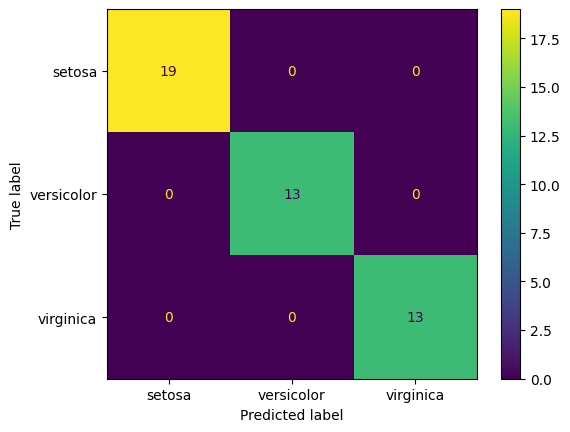

In [9]:
# Step 4: Evaluate Best K (e.g., K=3)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_k = max(k_accuracies, key=k_accuracies.get)
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_best)
print(f"\nBest K = {best_k}, Accuracy = {accuracy:.2f}")

# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_best), display_labels=knn_best.classes_).plot()

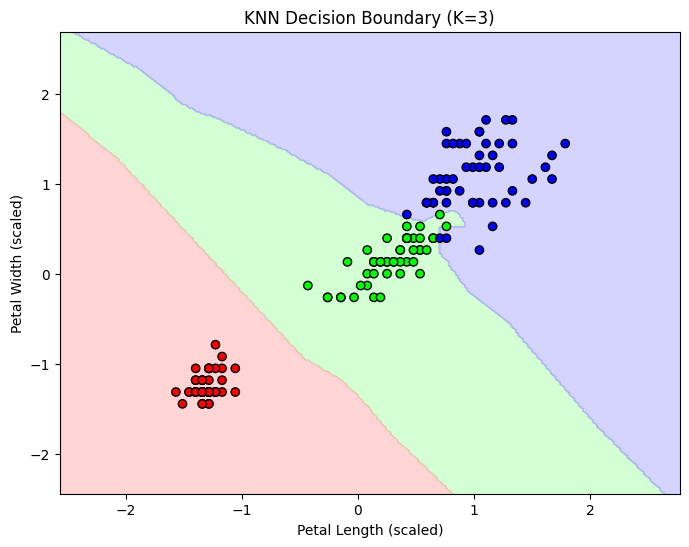

In [10]:
#Step 5: Visualize Decision Boundaries (2 Features Only)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

# Choose 2 features
X_vis = X[['petal length (cm)', 'petal width (cm)']]
X_vis_scaled = scaler.fit_transform(X_vis)
y_encoded = LabelEncoder().fit_transform(y)

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis_scaled, y_encoded, test_size=0.3, random_state=42)
model_vis = KNeighborsClassifier(n_neighbors=best_k)
model_vis.fit(X_train_vis, y_train_vis)

# Meshgrid for decision boundary
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.5)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_encoded, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolor='k')
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.show()